# Second Term Project
# By student: Yaseen Saeed Mahmoud

## 0. Introduction

### 0.1. About the project
This project aims to cover the following fields:-

    1. Gathering data from three datasets about ratings of dogs

    2. Wrangling each data set

    3. Save data into one dataframe

    4. Apply some EDA on this dataframe

We will be using python as a programming language to accomplish these tasks

### 0.2. Analysis questions
After completing the wrangling process, we will discuss the following questions in the analysis:-

  `1. What is the highest machine model in terms of being sure of the kind of the dog?`

  `2. What is the spread of the ratings in this datsets?`

  `3. What is the distribution of the favourites?`

  `4. What is the spread of the retweet number?`

  `5. What is the relation between retweets & favourites?`

  `6. What is the relation between favourites and ratings?`

### 0.3. Importing Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import requests


### 0.4. Defining functions

#### 0.4.1. A histogram function

In [2]:
# Create a plotting function for a histogram
def histogram(df, col):
  """
  A function that plots histogram along with the xlabel, ylabel and title

  Arg:
  1. df: The dataframe
  2. col: The column name

  Return:
  A histogram of the column
  """
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f"Histogram for {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

#### 0.4.2. A scatterplot function

In [3]:
# Define a plotting functon for scatterplots
def scatterplot(df, x, y):
  """
  A function that plots scatterplot along with the xlabel, ylabel and title

  Arg:
  1. df: The dataframe
  2. x: The x column
  3. y: The y column

  Return:
  A scatterplot of the columns
  """
  sns.scatterplot(data=df, x=x, y=y)
  plt.title(f"{x} vs {y}")
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

---
---

## 1. Gathering data

We will gather data from three different files which are:-
    
    1. Image-prediction.tsv

    2. Tweet-json.txt

    3. Twitter-archive-enhanced.csv

In [4]:
# Gather data from twitter-archive-enhanced.csv dataset
twitter = pd.read_csv('Original datasets/twitter-archive-enhanced.csv')

In [5]:
# Dowmload the image-prediction.tsv file programmatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
os.makedirs("Original datasets", exist_ok=True)
file_path = os.path.join("Original datasets", "image-prediction.tsv")
response= requests.get(url)
if response.status_code == 200:
    with open(file_path, "wb") as file:
        file.write(response.content)

In [6]:
# Read data from image-predictions.tsv dataset
prediction = pd.read_csv("Original datasets/image-prediction.tsv", sep="\t")

In [7]:
# Gather data from tweet-json.txt
tweet = pd.read_json("Original datasets/tweet-json.txt", lines=True)

Good! All datasets were loaded successfully

---
---

## 2. Data Wrangling

In this stage, we will wrangle each dataframe separately

### 2.1. Data Assessment

#### 2.1.1. Assessing the twitter-archive-enhanced.csv dataset

##### 2.1.1.1. Programmatic assessment

A- Check for Completeness

In [8]:
# Check for nulls
twitter.isnull().sum()

,0
tweet_id,0
in_reply_to_status_id,2278
in_reply_to_user_id,2278
timestamp,0
source,0
text,0
retweeted_status_id,2175
retweeted_status_user_id,2175
retweeted_status_timestamp,2175
expanded_urls,59


There are nulls in many columns such as:-

    1. 2278 nulls in in_reply_to_status_id column

    2. 2278 nulls in in_reply_to_user_id column

    3. 2175 nulls in retweeted_status_id column

    4. 2175 nulls in retweeted_status_user_id column

    5. 2175 nulls in retweeted_status_timestamp column

    6. 59 nulls in expanded_urls column

    7. 745 nulls in name column

    8. 2259 nulls in doggo column

    9. 2346 nulls in floofer column

    10.2099 nulls in pupper column

    11. 2326 nulls in puppo column

B- Check for Uniqueness

In [9]:
# Check for duplicates
twitter.duplicated().sum()

np.int64(0)

There are no duplicates

C- Check for Validity

In [10]:
# Check for dtypes
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

There are some problems concerning dtypes of some columns such as:-
    
    1. tweet_id column is int64 whereas it should be object

    2. in_reply_to_status_id is float64 whereas it should be object

    3. in_reply_to_user_id is float64 whereas it should be object

    4. retweeted_status_id is float64 whereas it should be object  

    5. retweeted_status_user_id is float64 whereas it should be object

    6. timestamp column is object whereas it should be datetime64[ns]

    7. retweeted_status_timestamp column is object whereas it should be datetime64[ns]

D- Check for Consistency of tweet_id

In [11]:
# Check for consistency of tweet_id
twitter['tweet_id'].value_counts().sum()

np.int64(2356)

The values of tweet_id are different from each other, which is absolutely correct

#### 2.1.1.2. Visual assessment

A- Check for accuracy for rating_numerator and rating_denominator columns

In [12]:
# Get summary statistics of rating_numerator columns
twitter["rating_numerator"].describe()

,rating_numerator
count,2356.000000
mean,13.126486
std,45.876648
min,0.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,1776.000000


Text(0.5, 1.0, 'Histogram for Rating Numerator')

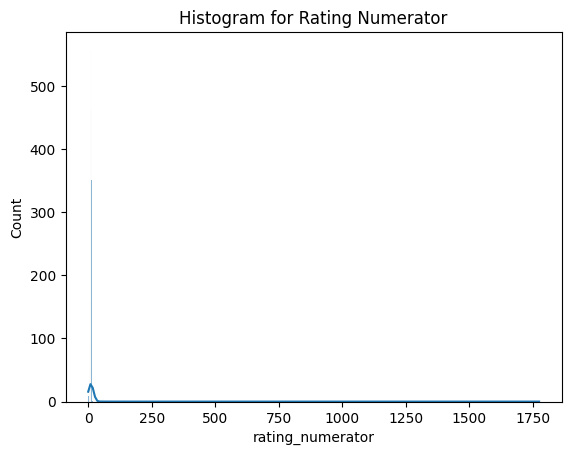

In [13]:
# Draw histogram for rating_numerator column
sns.histplot(data=twitter, x="rating_numerator", kde=True)
plt.title("Histogram for Rating Numerator")

There is an obvious outlier which is 1776

In [14]:
# Get summary statistics for rating_denominator columns
twitter["rating_denominator"].describe()

,rating_denominator
count,2356.000000
mean,10.455433
std,6.745237
min,0.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,170.000000


The rating is supposed to be out of 10. How there is a rating out of 170??

Text(0.5, 1.0, 'Histogram for Rating denominator')

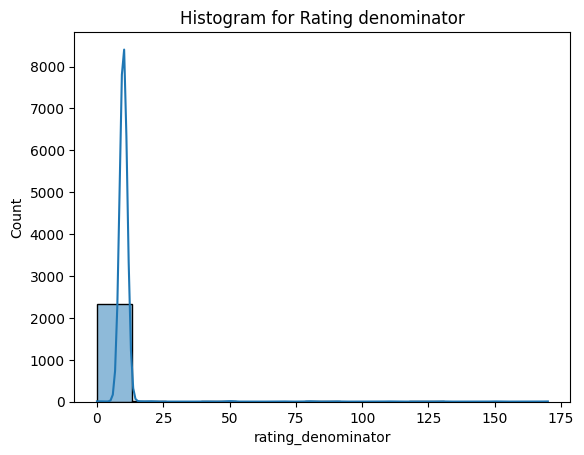

In [15]:
# Create a histogram for rating_denomenator
sns.histplot(data=twitter, x="rating_denominator", kde=True)
plt.title("Histogram for Rating denominator")

This graph also shows us the problem of having someone rating the dog out of 170

B- Check for tidiness issues

In [16]:
# View top 5 rows
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [17]:
# View Last 5 rows
twitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN


In [18]:
# View 5 sample rows
twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
648,793120401413079041,NaN,NaN,2016-10-31 16:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Robin. She's desperately trying to do ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793120401...,11,10,Robin,NaN,NaN,NaN,NaN
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,NaN,NaN,NaN,NaN
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,NaN,pupper,NaN
161,860563773140209665,NaN,NaN,2017-05-05 18:36:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lorenzo. He's an avid nifty hat wearer an...,NaN,NaN,NaN,https://www.gofundme.com/help-lorenzo-beat-can...,13,10,Lorenzo,NaN,NaN,NaN,NaN
2244,667886921285246976,NaN,NaN,2015-11-21 02:07:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Erik. He's fucken massive. But also ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667886921...,11,10,Erik,NaN,NaN,NaN,NaN


The last four columns violate The tidiness rule that states that `Each variable represents a column` and our variable here is the type of the dog


**Report**: There are some issues concerning the twitter data which can be categorized into:-

*A- Quality:-*
    
    1. Completeness: Many nulls were found (Note: I suggest that this dataset should be gathered again)

    2. Uniqueness: No duplicates were found

    3. Validity: There are some problems concerning dtypes of some columns

    4. Consistency: No issue found

    5. Accuracy: There was an issue concerning the rating_numerator and rating denominator columns

*B- Tidiness* : The last four columns should be in one column called " Type of the dog "



---

#### 2.1.2. Assessing the image-prediction.tsv dataset

##### 2.1.2.1. Programmatic assessment

A- Check for completeness issues

In [19]:
# Check for nulls
prediction.isnull().sum()

,0
tweet_id,0
jpg_url,0
img_num,0
p1,0
p1_conf,0
p1_dog,0
p2,0
p2_conf,0
p2_dog,0
p3,0


Good! No nulls were found

B- Check for Uniqueness issues

In [20]:
# Check for duplicates
prediction.duplicated().sum()

np.int64(0)

Good! No duplicates were found

C- Check for Validity issues

In [21]:
# Check for dtypes errors
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The tweet_id column should be object not int64

D- Check for Consistency issues

In [22]:
# Check that tweet_id here has no duplicated values
prediction.value_counts().sum()

np.int64(2075)

Good! No duplicated tweet_ids were found

##### 2.1.2.2. Visual assessment

A- Check for data accuracy problems in the confirmation columns

In [23]:
# Get summary statistics for the numeric columns (i.e. in this dataset the confirmation columns)
prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


So far I don't see any value of confirmation that is greater than 1

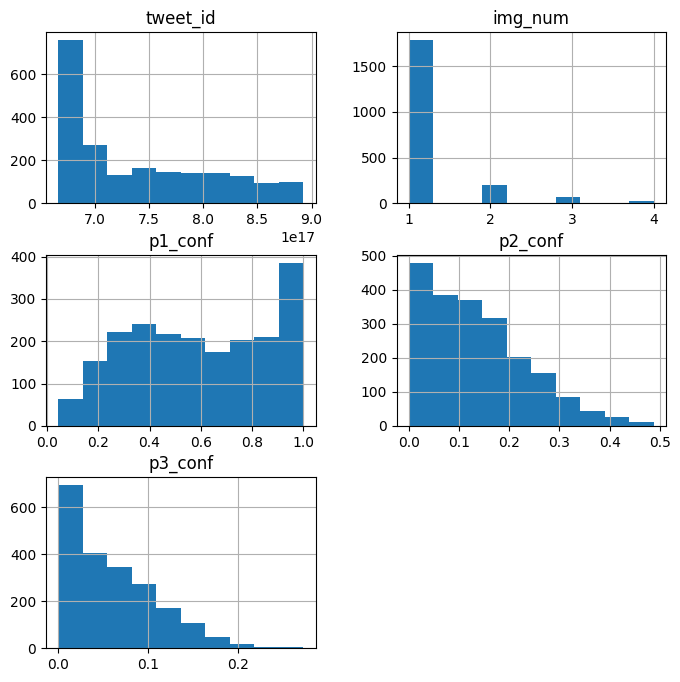

In [24]:
# Draw histogram for confirmation columns
prediction.hist(figsize=(8, 8));

Good! No accuracy issues were found

B- Check for tidiness issues

In [25]:
# View top 5 rows
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
# View last 5 rows
prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [27]:
# View 5 sample rows
prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1200,740995100998766593,https://pbs.twimg.com/media/CkiLHCjUUAAPwUr.jpg,1,malamute,0.454363,True,Samoyed,0.215967,True,Siberian_husky,0.077500,True
842,695051054296211456,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,1,Boston_bull,0.761454,True,pug,0.075395,True,Chihuahua,0.041598,True
1564,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True
1972,869596645499047938,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
1374,762699858130116608,https://pbs.twimg.com/media/CpWnecZWIAAUFwt.jpg,1,kelpie,0.519047,True,German_shepherd,0.296069,True,dingo,0.061005,False


Good! No tidiness issues detected

**Report:** This dataset didn't have any issues except for one validity issue:

*Quality issues:*

    1. Completeness issues: No issues were found

    2. Uniqueness issues: No issues were found

    3. Validity issues: The tweet_id should be object not int64

    4. Consistency issues: No issues were found

    5. Accuracy issues: No issues were found

*Tidiness issues:* No issues were found  

---

#### 2.1.3. Assessing the tweet-json.txt dataset

This function was necessary for fixing the `unhashable type 'list' error`

In [28]:
# A function to correct the (unhashable type: 'list' error)
def convert_to_hashable(x):
    """Converts a list or object to a tuple."""
    # Check if x is a list and not a Timestamp object before converting
    if isinstance(x, (list,dict)) and not isinstance(x, pd.Timestamp):
        return tuple(x)
    return x

# Apply the function on the dataset, but exclude the 'created_at' column
# to avoid the timestamp error
tweet_subset = tweet.drop(columns=['created_at']) # Exclude the 'created_at' column
tweet_subset = tweet_subset.map(convert_to_hashable)
tweet['created_at'] = tweet['created_at']  #Keep Original Datetime column
tweet[tweet_subset.columns] = tweet_subset # Update the original DataFrame with converted values

Now that the error was fixed let's begin our assessment

##### 2.1.3.1. Programmatic assessment

A- Check for completeness issues

In [29]:
# Check for null values
tweet.isnull().sum()

,0
created_at,0
id,0
id_str,0
full_text,0
truncated,0
display_text_range,0
entities,0
extended_entities,281
source,0
in_reply_to_status_id,2276


There are many nulls in this dataset such as:

    1. 281 nulls in extended_entities column

    2. 2276 nulls in in_reply_to_status_id column

    3. 2276 nulls in in_reply_to_status_id_str column

    4. 2276 nulls in in_reply_to_user_id column

    5. 2276 nulls in in_reply_to_user_id_str column

    6. 2354 nulls in geo column

    7. 2354 nulls in coordinates column

    8. 2353 nulls in place column

    9. 2354 nulls in contributors column

    10. 143 nulls in possibly_sensitive column

    11. 143 nulls in possibly_sensitive_appealable column

    12. 2175 nulls in retweeted_status column

    13. 2325 nulls in quoted_status_id column

    14. 2325 nulls in quoted_status_id_str column

    15. 2326 nulls in quoted_status column



B- Check for Uniqueness issues

In [30]:
# Check for duplicates
tweet.duplicated().sum()

np.int64(0)

Good! No duplicates found

C- Check for Validity issues

In [31]:
# Check for dtypes
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

There are many wrong dtypes such as:-

  1. id & id_str columns should be object but they are int64
  
  2. in_reply_to_status_id column should be object but it's float64

  3. in_reply_to_status_id_str column should be object but it's float64

  4. in_reply_to_user_id column should be object but it's float64

  5. in_reply_to_user_id_str column should be object but it's float64

  6. quoted_status_id column should be object but it's float64

  7. quoted_status_id_str column should be object but it's float64

D- Check for consistency in both lang and id columns

In [32]:
# Check for consistency in id column
tweet['id'].value_counts().sum()

np.int64(2354)

Excellent! No id was repeated

In [33]:
# Check for consistency in lang column
tweet['lang'].value_counts()

,count
lang,
en,2336
und,7
in,3
nl,3
eu,1
es,1
tl,1
ro,1
et,1


Good! All languages are wrritten in one format

##### 2.1.3.2. Visual assessment

A- Check for accuracy issues

In [34]:
# Get summary statistics of the retweet_count column
tweet['retweet_count'].describe()

,retweet_count
count,2354.000000
mean,3164.797366
std,5284.770364
min,0.000000
25%,624.500000
50%,1473.500000
75%,3652.000000
max,79515.000000


In [35]:
# Get summary statistics for favourite_count column
tweet['favorite_count'].describe()

,favorite_count
count,2354.000000
mean,8080.968564
std,11814.771334
min,0.000000
25%,1415.000000
50%,3603.500000
75%,10122.250000
max,132810.000000


Good! All values are within acceptable range

B- Check for Tidiness issues

In [36]:
# View first 5 rows
tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"(0, 85)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"(0, 138)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"(0, 121)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"(0, 79)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"(0, 138)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [37]:
# View last 5 rows
tweet.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"(0, 120)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"(0, 137)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"(0, 130)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"(0, 139)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"(0, 131)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [38]:
# View sample 5 rows
tweet.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
149,2017-05-12 16:05:02+00:00,863062471531167744,863062471531167744,Say hello to Quinn. She's quite the goofball. ...,False,"(0, 139)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,8945,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
801,2016-09-03 22:02:38+00:00,772193107915964416,772193107915964416,This is Willem. He's a Penn State pupper. Thin...,False,"(0, 104)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,6665,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1902,2015-12-09 16:52:27+00:00,674632714662858753,674632714662858752,Rare submerged pup here. Holds breath for a lo...,False,"(0, 140)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1617,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
53,2017-07-03 00:11:11+00:00,881666595344535552,881666595344535552,This is Gary. He couldn't miss this puppertuni...,False,"(0, 115)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,51522,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2249,2015-11-20 20:47:20+00:00,667806454573760512,667806454573760512,This is Filup. He is overcome with joy after f...,False,"(0, 102)","(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


The display_text_range column includes the start value and the end value, violating the rule that states that `Each variable represents a column`

**Report**: This dataset was messy and dirty as it had many quality and tidiness issues:-

*Quality issues:*  
  1. Completeness issues: Many nulls were found

  2. Uniqueness issues: No issues were found

  3. Validity issues: Many columns are of wrong dtypes

  4. Consistency issues: No issues were found

  5. Accuracy issues: No issues were found

*Tidiness issues:* The display_text_range should be split into two columns

**Note:**
  
  1. We will drop the user column as we don't need it in our analysis
  
  2. We will rename the id column to be tweet_id to make sure that no error occurs when merging the dataframes

---

### 2.2. Data Cleaning

#### 2.2.0. Create a new copy of the dataframe to apply cleaning on

In [39]:
# Create a copy from the twitter dataset
twitter_clean = twitter.copy()

In [40]:
# Create a copy from the prediction dataset
prediction_clean = prediction.copy()

In [41]:
# Create a copy from the tweet dataset
tweet_clean = tweet.copy()

#### 2.2.1. Cleaning the twitter dataset

##### A- Solve the completeness issues through:-
    
    1. fillna() method for all columns except id columns

    2. drop all id columns except the tweet_id column

In [42]:
# Fill NaNs using fillna() method in categorical columns
cols = ["expanded_urls", "name", "doggo", "floofer", "pupper","puppo"]
for col in cols:
    twitter_clean[col] = twitter_clean[col].fillna("Unknown")

In [43]:
# Drop all id columns except tweet_id column
columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp']
for col in columns:
   twitter_clean =  twitter_clean.drop(col, axis=1)

In [44]:
# Check if all nulls have been cancelled
twitter_clean.isna().sum().sum()

np.int64(0)

Good! Completeness issues are fixed

##### B- Solve Validity issues through:-

    1. astype() method for tweet_id

    2. to_datetime() method for timestamp

In [45]:
# Change dtype of twitter_id
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype('object')

In [46]:
# Change dtype of timestamp
twitter_clean['timestamp'] = pd.to_datetime(arg=twitter_clean['timestamp'])

In [47]:
# Check whether dtypes were changed
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2356 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

Good! Validity issues are fixed

##### C- Solve accuracy problems through:-

`Applying a mask to select values which are acceptable and replace overrated values with 20` for the numerator

`Applying a mask to change an value not equal to 10 into 10` for the denomenator

In [48]:
# Apply a mask for the numerator
twitter_clean['rating_numerator'] = twitter_clean['rating_numerator'].clip(upper=20)

In [49]:
# Make sure that the highest rating is 20
twitter_clean['rating_numerator'].describe()

,rating_numerator
count,2356.000000
mean,10.792869
std,2.383856
min,0.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,20.000000


In [50]:
# Change any denominator not equal to 10 into 10
def transform_to_10(number):
  """
  Changes a number to 10 if it is not equal to 10.

  Args:
    number: The number to be transformed

  Returns:
    10 if the number is not equal to 10, otherwise the original number.
  """
  if number != 10:
    return 10
  else:
    return number

# Apply the function on the rating_denominator column
twitter_clean['rating_denominator'] = twitter_clean['rating_denominator'].apply(transform_to_10)

In [51]:
# Make sure all denominators are equal to 10
twitter_clean['rating_denominator'].describe()

,rating_denominator
count,2356.0
mean,10.0
std,0.0
min,10.0
25%,10.0
50%,10.0
75%,10.0
max,10.0


Good! Accuracy problems are fixed

D- Solve the tidiness issues through:
  
  `Merging the last four columns of the data into one column carrying the value which isn't unknown and if type wasn't metioned, make value = 'Unknown' then dropping the last 4 columns`

In [52]:
# A function that solves the tidiness issues described within the dataset
def merge_dog_types(row):
  """
  Merges dog type columns, prioritizing 'doggo', then 'floofer', etc.

  Args:
    row: A row of the DataFrame.

  Returns:
    The merged dog type, or "Unknown" if none found.
  """
  if row['doggo'] != 'Unknown':
    return row['doggo']
  elif row['floofer'] != 'Unknown':
    return row['floofer']
  elif row['pupper'] != 'Unknown':
    return row['pupper']
  elif row['puppo'] != 'Unknown':
    return row['puppo']
  else:
    return 'Unknown'

# Apply the function on the dataframe
twitter_clean['dog_type'] = twitter_clean.apply(merge_dog_types, axis=1)

# Drop the original dog type columns
twitter_clean = twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [53]:
# Check whether problem was solved
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unknown
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unknown
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unknown
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unknown
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unknown


**Save the dataframe**

In [54]:
# Save the twitter dataframe
twitter_clean.to_csv("Cleaned datasets/Cleaned_twitter.csv", index=False)
# Create a new dataframe for the cleaned dataset
new_twitter = pd.read_csv("Cleaned datasets/Cleaned_twitter.csv")

---

#### 2.2.2. Cleaning the prediction dataset

##### A- Solve the validity issue through:
`Using astype() method to change dtype of tweet_id from int64 to object`

In [55]:
# Change dtype of tweet_id
prediction_clean['tweet_id'] = prediction_clean['tweet_id'].astype("object")

In [56]:
# Check if the dtype of tweet_id was fixed
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


Good! The validity issues are fixed

**Save the dataframe**

In [57]:
# Save the dataframe
prediction_clean.to_csv("Cleaned datasets/Cleaned_prediction.csv",index=False)
# Create a new dataframe for the cleaned dataset
new_prediction = pd.read_csv("Cleaned datasets/Cleaned_prediction.csv")

---

#### 2.2.3. Cleaning the tweet dataset

A- Solve completeness issues by using:

  1. fillna() method to fill nulls with placeholders in `extended_entities`, `possible_sensitive` & `possibly_sensitive_appealable` columns

  2. drop() method to drop all columns which have more than 2000 nulls

In [58]:
# Use fillna() method to change nulls into placeholder values
# Change nulls in extended_entities column into 'Unknown'
tweet_clean['extended_entities'] = tweet_clean['extended_entities'].fillna("Unknown")
# Change nulls in possibly_sensitive & possibly_sensitive_appealable into the median of the column
cols = ['possibly_sensitive', 'possibly_sensitive_appealable']
for col in cols:
    tweet_clean[col] = tweet_clean[col].fillna(tweet[col].median())

In [59]:
# Delete columns that have over 2000 nulls
columns = ['in_reply_to_status_id', 'in_reply_to_status_id_str',
           "in_reply_to_user_id", "in_reply_to_user_id_str", "in_reply_to_screen_name",
           "geo","coordinates" ,"place", "contributors", "retweeted_status", "quoted_status_id",
           "quoted_status_id_str", "quoted_status"]
for col in columns:
    tweet_clean = tweet_clean.drop(col, axis=1)

In [60]:
# Check whether nulls are fixed
tweet_clean.isnull().sum().sum()

np.int64(0)

Good! Completeness issues are fixed

B- Solve validity issues through:
    
  `Changing dtypes of id and id_str columns to object`

In [61]:
# Change dtypes of id and id_str columns into object
cols = ['id', 'id_str']
for col in cols:
    tweet_clean[col] = tweet_clean[col].astype("object")

In [62]:
# Check if dtypes were fixed
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   object             
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2354 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

Good! The validity issues are fixed

C- Solve tidiness issues (The display_text_range column) through:

  `Taking the difference between end value and start value from the tuple then put the difference in a new column called no_of_chars_of_the_tweet`

In [63]:
# Create a function that extracts the difference between the two values of the
# tuple and places it in one column
def split_tuple_column(df, column_name, new_col):
  """
  Takes the column containing 2D Tuples then subtract 1st value from 2nd value
  then puts the result in a new column.

  Args:
    df: The pandas DataFrame.
    column_name: The name of the column containing the tuples.

  Returns:
    The modified DataFrame with the split columns.
  """
  # Create new columns by applying str accessor and get
  start = list(df[column_name].str[0])
  end = list(df[column_name].str[1])
  # Change dtype of the list into int
  start = [int(i) for i in start]
  end = [int(i) for i in end]
  no_of_chars = []
  # Append new values for the new list by subtracting start value from end value
  for i in range(len(start)):
    no_of_chars.append(end[i] - start[i])
  # Make a new column taking its values from the no_of_chars list
  df[new_col] = no_of_chars
  # Drop the original column
  df = df.drop(columns=[column_name])
  return df

# Apply function on the tweet dataset:
tweet_clean = split_tuple_column(tweet_clean, 'display_text_range', 'no_of_chars_of_the_tweet')

In [64]:
# Make sure that the tidiness issue was fixed
tweet_clean.head()

,created_at,id,id_str,full_text,truncated,entities,extended_entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,no_of_chars_of_the_tweet
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...","(id, id_str, name, screen_name, location, desc...",False,8853,39467,False,False,0.0,0.0,en,85
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...","(id, id_str, name, screen_name, location, desc...",False,6514,33819,False,False,0.0,0.0,en,138
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...","(id, id_str, name, screen_name, location, desc...",False,4328,25461,False,False,0.0,0.0,en,121
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...","(id, id_str, name, screen_name, location, desc...",False,8964,42908,False,False,0.0,0.0,en,79
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"(hashtags, symbols, user_mentions, urls, media)","(media,)","<a href=""http://twitter.com/download/iphone"" r...","(id, id_str, name, screen_name, location, desc...",False,9774,41048,False,False,0.0,0.0,en,138


Good! The Tidiness issues were fixed

D- Drop the user column

In [65]:
# Drop the user column
tweet_clean = tweet_clean.drop(columns=['user', 'id_str'])

E- Rename the id column to be tweet_id

In [66]:
# Rename th id column
tweet_clean = tweet_clean.rename(columns={'id': 'tweet_id'})

**Save the dataframe**

In [67]:
# Save the dataframe
tweet_clean.to_csv("Cleaned datasets/Cleaned_tweet.csv", index=False)
# Create a new dataframe for the cleaned file
new_tweet = pd.read_csv("Cleaned datasets/Cleaned_tweet.csv")

---
---

## 3. Merge the three dataframes into a master dataframe then save it

### 3.1. Merge the dataframes

In [68]:
# Merge the first two dataframes
api_df = pd.merge(new_twitter, new_tweet, on='tweet_id', how='inner')

In [69]:
# Merge the api_df and the prediction data frame
master_df = pd.merge(api_df, new_prediction, on='tweet_id', how='inner')

### 3.2. Make sure the master df has no problems before starting our analysis

**After viewing the file, I noticed that the full text of the tweet was repeated in two columns so we should delete one of them**

In [70]:
# Drop one of the full text columns as they are duplicated
master_df = master_df.drop(columns=['full_text'])

Good! That column was duplicated and we got rid of it

**Another problem was that the text contains `RT @` retweet which should be removed**

In [71]:
# Create a function to find and remove the rt text
def remove_rt_text(tweet):
    if "RT @" in tweet:
        start = tweet.find("RT @")
        end = tweet.find(":", start)
        if end != -1:
            rt_text = tweet[start:end+1]  # include the colon
            # Remove RT @text: and strip leading spaces
            return tweet.replace(rt_text, "").strip()
    return tweet
# Apply the function on the dataframe
master_df['text'] = master_df['text'].apply(remove_rt_text)

**Let's also check if there are any completeness or validity issues**

In [72]:
# Make sure that the dtypes are correct
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2073 non-null   int64  
 1   timestamp                      2073 non-null   object 
 2   source_x                       2073 non-null   object 
 3   text                           2073 non-null   object 
 4   expanded_urls                  2073 non-null   object 
 5   rating_numerator               2073 non-null   int64  
 6   rating_denominator             2073 non-null   int64  
 7   name                           2073 non-null   object 
 8   dog_type                       2073 non-null   object 
 9   created_at                     2073 non-null   object 
 10  truncated                      2073 non-null   bool   
 11  entities                       2073 non-null   object 
 12  extended_entities              2073 non-null   o

We should fix the tweet_id, timestamp and created_at columns before we start our analysis

In [73]:
# Change the dtype of the tweet_id
master_df['tweet_id'] = master_df['tweet_id'].astype('object')
# Change dtype of timestamp and created_at columns
master_df['timestamp'] = pd.to_datetime(arg=master_df['timestamp'])
master_df['created_at'] = pd.to_datetime(arg=master_df['created_at'])

In [74]:
# Check if it was fixed
cols = ['tweet_id', 'timestamp', 'created_at']
master_df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tweet_id    2073 non-null   object             
 1   timestamp   2073 non-null   datetime64[ns, UTC]
 2   created_at  2073 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), object(1)
memory usage: 48.7+ KB


Finally! All problems are solved and we can start our analysis

### 3.3. Save the master dataframe

In [75]:
# Save The master_df
master_df.to_csv("Cleaned datasets/master_df.csv", index=False)

---
---

## 4. Perform some EDA & visualizations on the master_df

### 4.0. Get summary statistics of the numeric columns

In [76]:
# Get summary statistics for the master_df
master_df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,no_of_chars_of_the_tweet,img_num,p1_conf,p2_conf,p3_conf
count,2073.000000,2073.0,2073.000000,2073.000000,2073.0,2073.0,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03
mean,10.676315,10.0,2976.089243,8556.718283,0.0,0.0,111.586589,1.203570,0.594532,1.346665e-01,6.034005e-02
std,2.357708,0.0,5054.897526,12098.640994,0.0,0.0,26.261775,0.561856,0.271234,1.006830e-01,5.092769e-02
min,0.000000,10.0,16.000000,0.000000,0.0,0.0,13.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.0,634.000000,1674.000000,0.0,0.0,94.000000,1.000000,0.364095,5.390140e-02,1.619920e-02
50%,11.000000,10.0,1408.000000,3864.000000,0.0,0.0,116.000000,1.000000,0.588230,1.186220e-01,4.947150e-02
75%,12.000000,10.0,3443.000000,10937.000000,0.0,0.0,137.000000,1.000000,0.843911,1.955730e-01,9.193000e-02
max,20.000000,10.0,79515.000000,132810.000000,0.0,0.0,148.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


Well we can see that:-
    
  `1. The highest rating was 20 and the least was 0`

  `2. The highest no of retweets was 79515 and the least was 16`

  `3. The highest no of favourites counts was 132810 and the least was 0`

### Research question #1: What is the highest machine model in terms of being sure of the kind of the dog?

I expect that all three models will be close to each other, with a slight difference between them

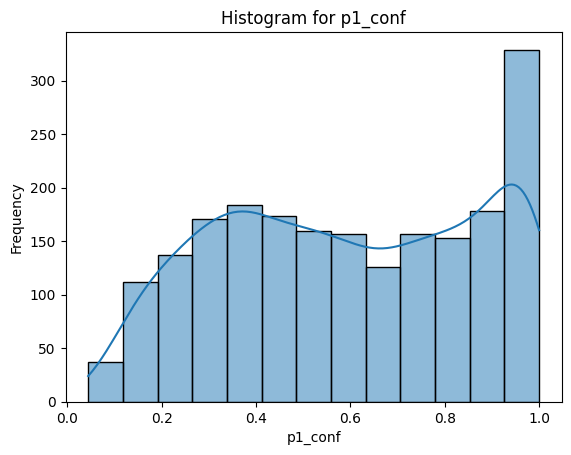

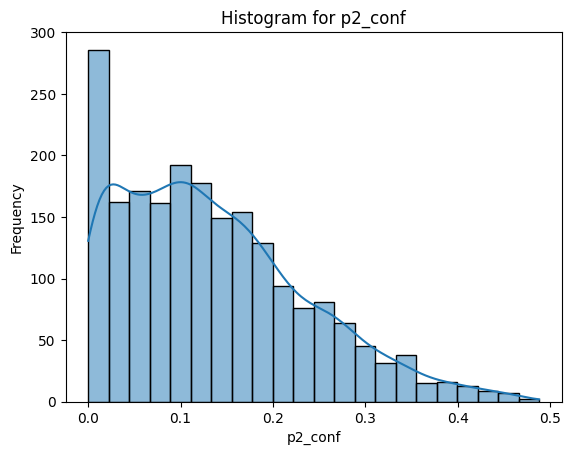

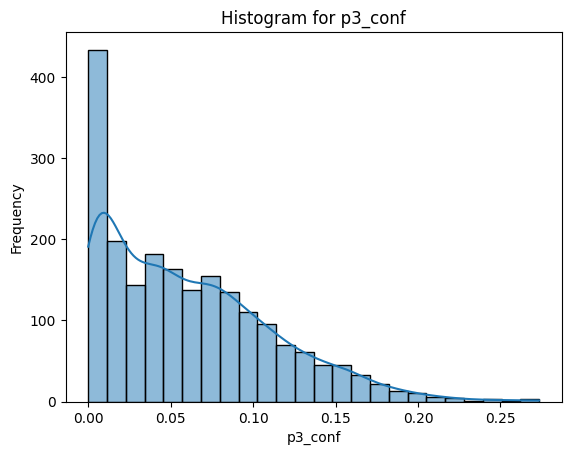

In [77]:
# Create three histograms for each of the p1_conf, p2_conf, p3_conf
cols = ['p1_conf', 'p2_conf', 'p3_conf']
for col in cols:
    histogram(master_df, col)

Well I didn't expect that. The p1 model was the most reliable model as its results were the closest to 1, while the p3 model was the least reliable model as its results didin't even pass 0.25

### Research question #2: What is the spread of the ratings in our dataset?

It's expected that most ratings lie within the mean which is approximately equal to 11

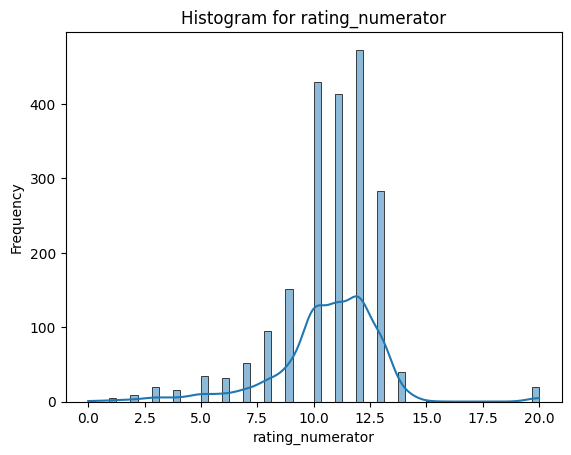

In [78]:
# Create a histogram for the rating_numerator column
histogram(master_df, 'rating_numerator')

As expected the highest ratings are within the mean, and the spread of this data is normal so it's close to be a symmetric data

### Research question #3: What is the distribution of the favourites?

I expect that the favourites lie within the mean, same as the rating_numerator column

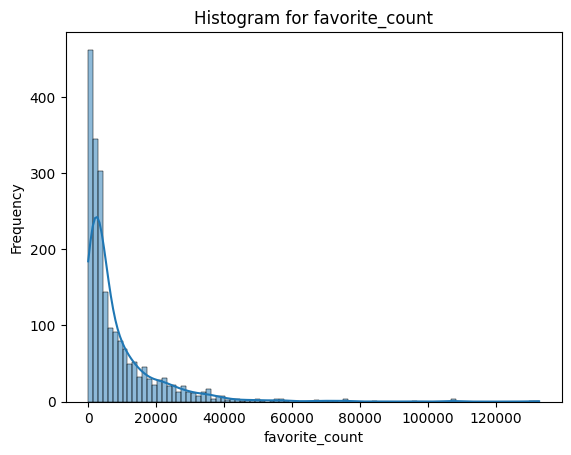

In [79]:
# Generate a histogram for the favourites column
histogram(master_df, 'favorite_count')

Well, unlike what I expected, most favourites are between 0-40000 which is a relatively small range. There are a ton of outliers present in our distribution from 40000-120000 which is a large range. This suggests that the distribution is very right skewed

### Research question #4: What's the spread of the number of retweets?

I expect that the spread of the number of retweets is symmetric ( Around the mean )

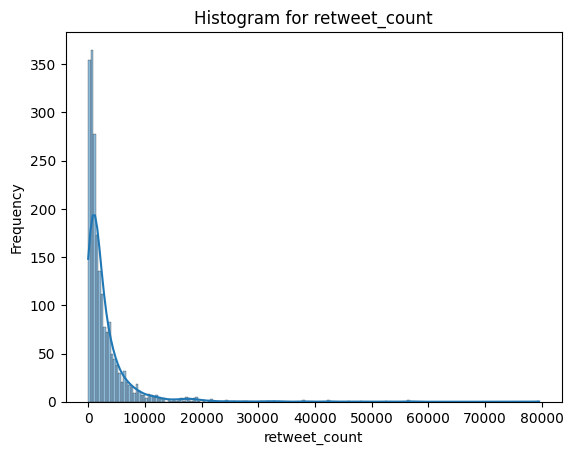

In [80]:
# Create a histogram for the retweet_count column
histogram(master_df, 'retweet_count')

Also this distribution wasn't expected, as most data are within the range from 0 to 20000, but there are outliers present from 20000-80000 which suggests that the distribution is very right skewed

### Research question #5: What's the relation between number of retweets & number of favourites?

I expect that there is a slight correlation between retweets and favourites

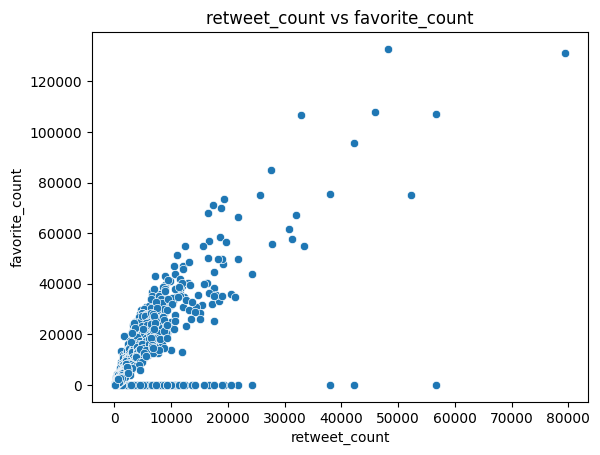

In [81]:
# Create a scatterplot for retweet_count column and favourites_count column
scatterplot(master_df, 'retweet_count', 'favorite_count')

Exactly as I expected the retweet_count positively correlates slightly to the favourite_count

### Research question #6: What is the relation between favourites & ratings?

I expect that the ratings correlates with the favourites counts

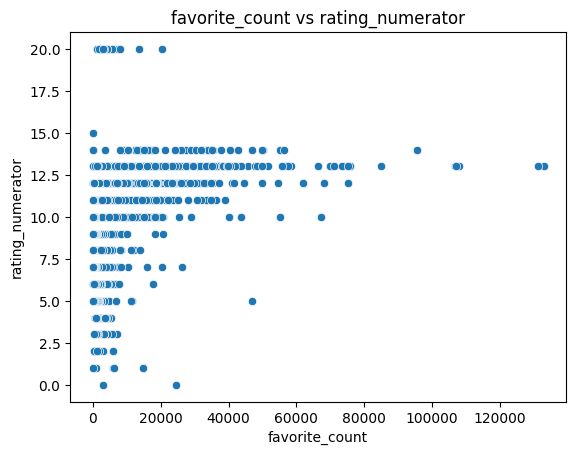

In [82]:
# Plot a scatterplot for the favourites and ratings
scatterplot(master_df, 'favorite_count', 'rating_numerator')

Well it wasn't expected that the ratings and favourites have a really low correlation between them as shown in the scatterplot

---
---

## 5. Report and Limitations

**Report**: Here we come to an end for our project, and here is what we've done through the project:-

  1. Gathered data from different sources

  2. Wrangle each dataset separately and documented each step

  3. Saved the cleaned datasets

  4. Merged the three datasets into a master_df, and checked if any problem had occured to it while merging

  5. Conducted data analysis for the master_df, and these were the results:-
    
      * The p1 machine model is the most reliable model, while the p3 machine
      model is the least reliable model

      * The ratings lie around the mean, and the distribution is symmetrical

      * Both the retweet_count and the favourite_count distributions are very right skewed

      * The retweet_count correlates positively and slightly with the favourites_count

      * The ratings and the favourites have a very low correlation
  6. Writing a brief report of what we've done

**Limitations**: The lack of time was a huge challenge to me and I wish I had done a more thorough and complex analysis

**Note:** For a very detailed report for each of the wrangling and analysis stages, check the `wrangle_report.docx` and the `act_report.docx` files